In [46]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from torchvision.models import vgg16_bn
import PIL
import imageio
from superres import *
from superres.helpers import *
from scipy.ndimage.interpolation import zoom as nd_zoom

In [2]:
img_data = Path('/scratch/bpho/datasets/paired_001/')
model_path = Path('/scratch/bpho/models')

In [90]:
hr_files = list((img_data/'hr/train').glob('*.tif'))
lr_files = [img_data/'lr/train'/fn.relative_to(img_data/'hr/train') for fn in hr_files]
lr_up_files = [img_data/'lr_up/train'/fn.relative_to(img_data/'hr/train') for fn in hr_files]

In [132]:
def micro_crappify(data, gauss_sigma = 20, scale=4., order=1): #data: 1 frame; play with sigma?
    x = np.random.poisson(np.maximum(0,data), astype(np.int))
    noise = np.random.normal(0,gauss_sigma,size=(x.shape[0],x.shape[1],1)).astype(np.float32)
    x = np.maximum(0,x+noise)
    x_down = nd_zoom(x, (1/scale, 1/scale, 1), order=0)
    x_down_up = nd_zoom(x_down, (scale, scale, 1), order=order)
    return x_down.astype(np.uint8), x_down_up.astype(np.uint8)

for hr_fn, lr_fn, lr_up_fn in zip(hr_files, lr_files, lr_up_files):
    hr_img = PIL.Image.open(hr_fn)
    lr_img = PIL.Image.open(lr_fn)
    lr_up_img = PIL.Image.open(lr_up_fn)
    
    down, down_up = micro_crappify(np.array(hr_img)[:,:,0])
    down_img = PIL.Image.fromarray(down)
    down_up_img = PIL.Image.fromarray(down_up)
    
    break

NameError: name 'astype' is not defined

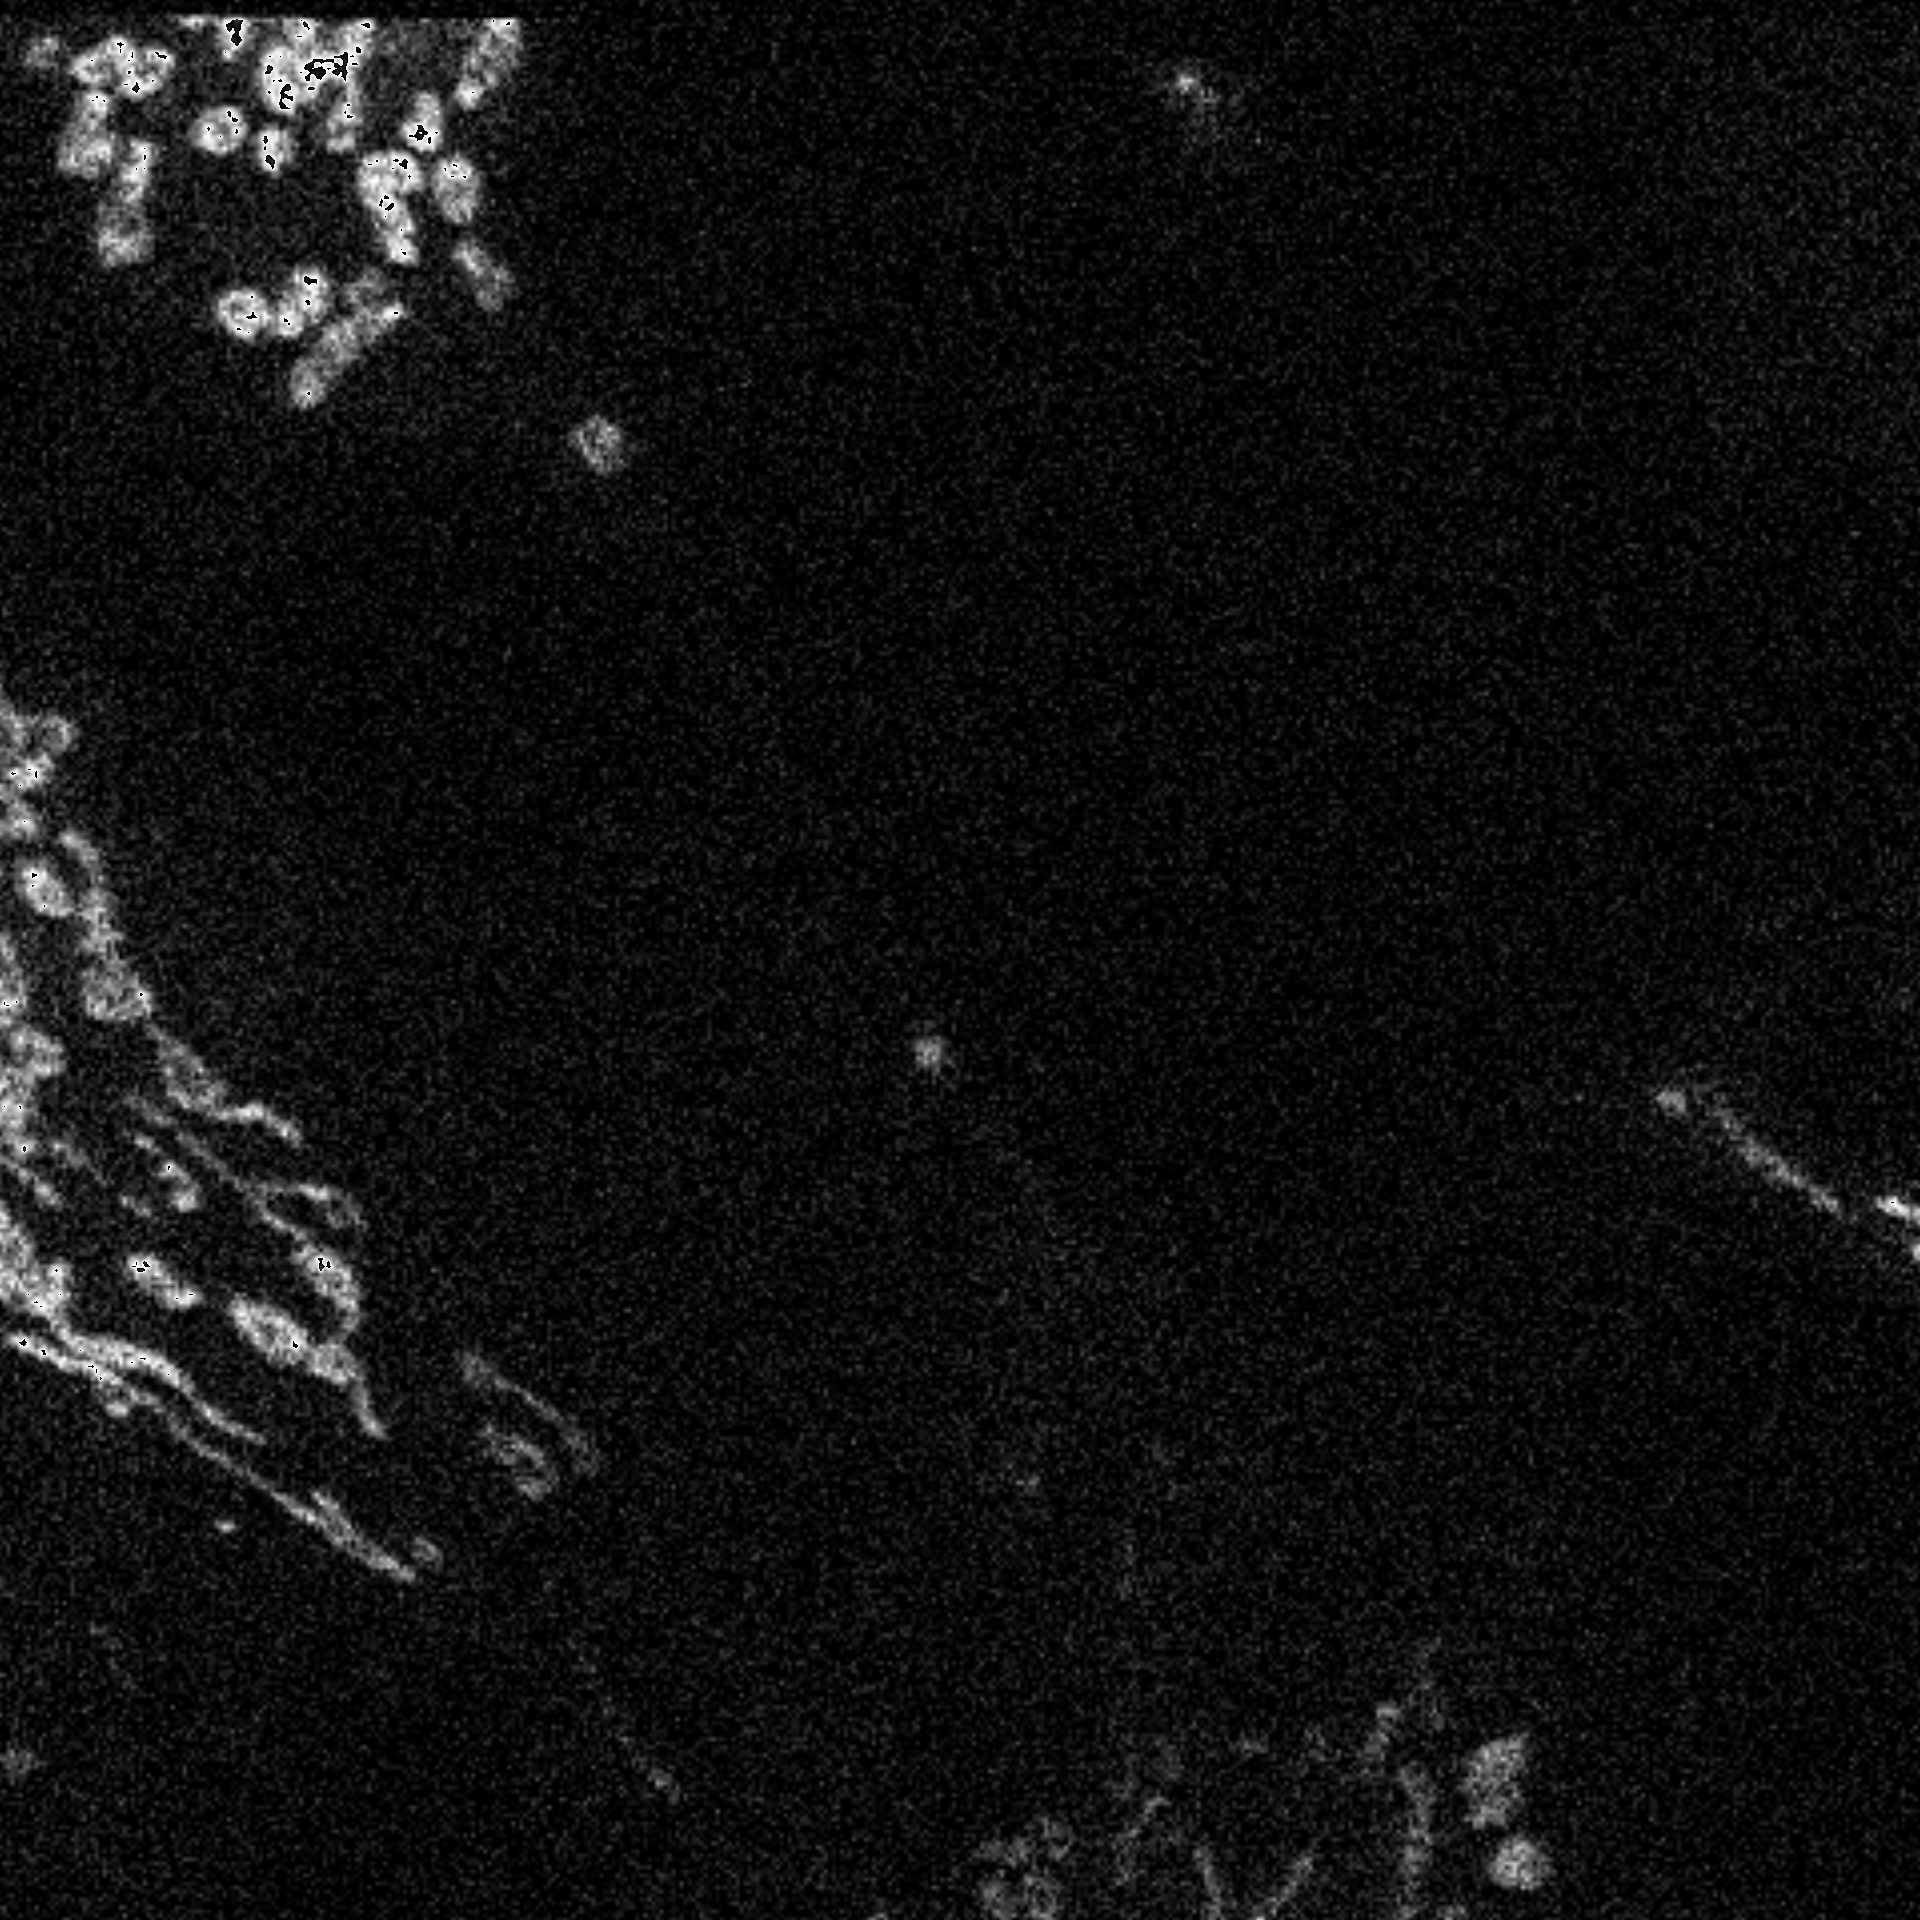

In [130]:
down_up_img

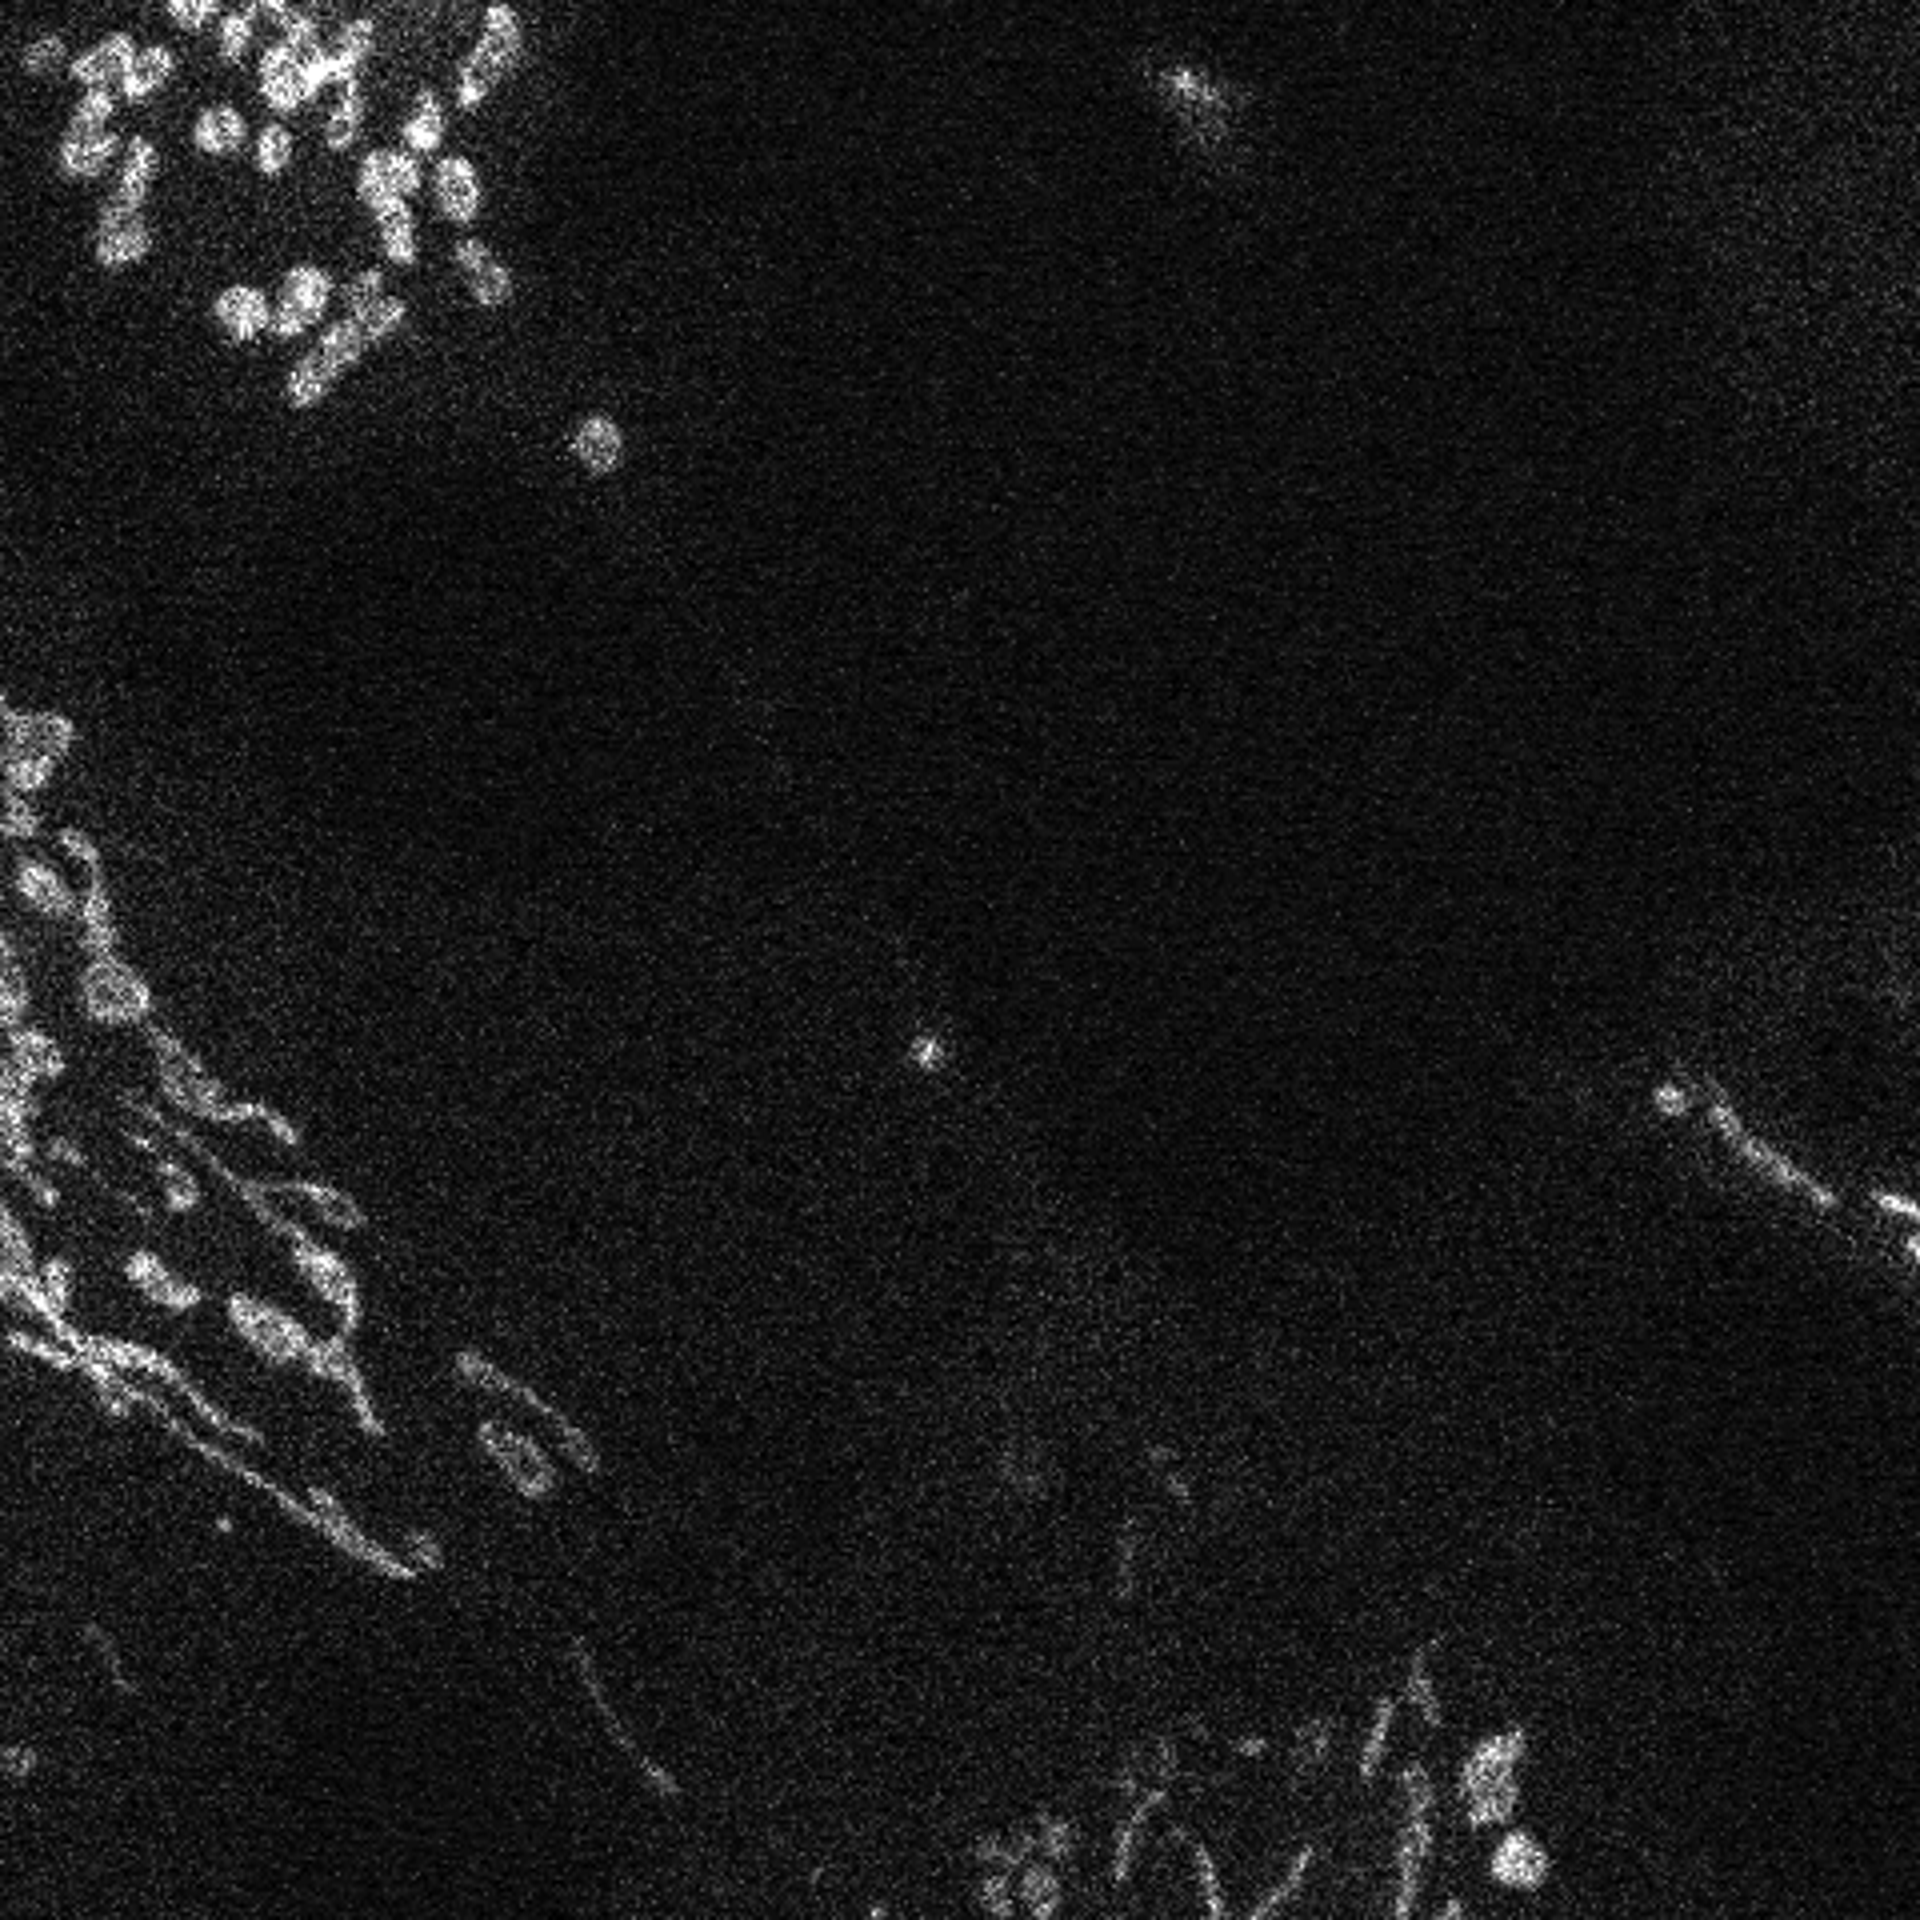

In [131]:
lr_up_img